In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

Question 1

In [67]:
infections = pd.read_csv("../MIDTERM DATA SETS/covid19_infections.csv")

In [68]:
infections["month"] = infections["date"].str.split('/',expand=True)[0]#manulate the date data
infections["day"] = infections["date"].str.split('/',expand=True)[1]
infections["year"] = "20"+infections["date"].str.split('/',expand=True)[2]
infections["date"] = infections["year"] + '/' +infections["month"] +'/' +infections["day"]
infections["date"] = pd.to_datetime(infections["date"]) 

In [69]:
df2 = pd.read_csv("../MIDTERM DATA SETS/covid19_admissions.csv")

In [70]:
admissions = df2.pivot(index="week",columns="new_admission_type",values='count').reset_index()#reshape to tidy DataFrame

In [71]:
admissions = admissions.rename(columns={"week":"epi_week"})

In [72]:
qn10 = infections.merge(admissions , how="left" ,on="epi_week")
qn10 = qn10.drop(columns=["month" , "day" , "year"])#delete columns not needed
qn10.head()

,epi_week,date,Count,Hospitalised,ICU
0,2023-08,2023-02-19,4471,86,3
1,2023-09,2023-02-26,4426,84,5
2,2023-10,2023-03-05,10352,160,6
3,2023-11,2023-03-12,10464,218,7
4,2023-12,2023-03-19,14467,267,7


Question 2

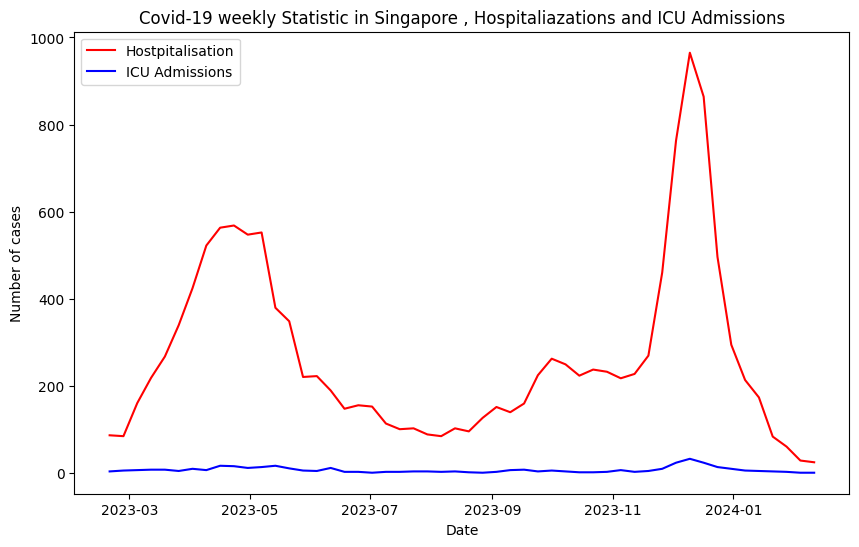

In [73]:
plt.figure(figsize=(10,6))
plt.plot(qn10["date"],qn10["Hospitalised"],color = 'red' , label = "Hostpitalisation")
plt.plot(qn10["date"],qn10["ICU"],color = 'blue' , label = "ICU Admissions")
plt.ylabel("Number of cases")
plt.xlabel("Date")
plt.title("Covid-19 weekly Statistic in Singapore , Hospitaliazations and ICU Admissions")
plt.legend(loc = "upper left")
plt.show()